# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

### Students

* Team: 37
* Students: Isabela Constantin, Adélie Garin, Celia Hacker, Michael Spieler
* Dataset: Wikipedia

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
import numpy as np

# the adjacency matrix we will work with is the adjacency matrix of the largest weakly connected component 
adjacency_disconnected =  np.load('adjacency_undirected.npz')['arr_0'] # the adjacency matrix
adjacency = np.load('largest_wcc.npz')['arr_0'] 
n_nodes =  adjacency.shape[0] # the number of nodes in the network
n_edges =  int(np.sum(adjacency)/2) # the number of edges in the network
print('the network has {} nodes and {} edges'.format(n_nodes, n_edges))

the network has 4589 nodes and 106589 edges


## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [2]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [3]:
def erdos_renyi(n, proba, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    if seed is not None:
        np.random.seed(seed)
        
    adjacency = np.zeros((n,n))
    adjacency[np.triu_indices(n, k=1)] = np.random.choice(2, int(n*(n-1)/2), p=[1-proba, proba])
    adjacency = adjacency + adjacency.T
    return adjacency


Text(0.5,1.05,'Erdos-Renyi (5, 0.6)')

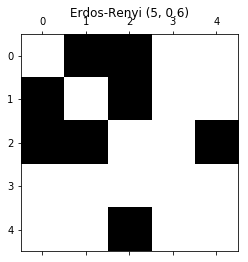

In [4]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5,1.05,'Erdos-Renyi (10, 0.4)')

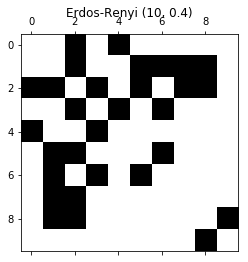

In [5]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

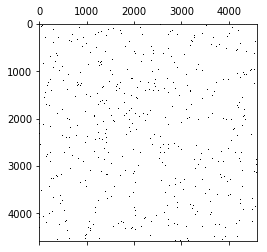

In [6]:
proba= n_edges/(n_nodes*(n_nodes-1)/2)
randomER= erdos_renyi(n_nodes,proba)
plt.spy(randomER)

**Your answer here.**
We chose the same number of nodes as our graph. In order to have a similar number of edges as our graph, we chose the probability to be the number of edges divided by the maximum number of edges possible for a graph on n_nodes

In [7]:
print(proba)

0.010125137192668948


### Question 3

Create a function that constructs a Barabási-Albert graph.

In [8]:
def barabasi_albert(n, m, m0=2, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    assert m <= m0
    
    if seed is not None:
        np.random.seed(seed)
    
    adjacency = np.zeros([n, n], dtype=int)
    degree = np.zeros(n, dtype=int)

    # generate initial connected network with one edge per added node. (m0-1 edges)
    #this is to have a connected graph
    for i in range(1, m0):
        target = np.random.choice(i, 1)
        adjacency[i, target] = adjacency[target, i] = 1
        degree[i] += 1
        degree[target] += 1

    # Grow network
    for i in range(m0, n):
        # Preferential attachment: probability that the new node connects to node i 
        dist = degree[:i] / np.sum(degree[:i])

        # Choose m links without replacement with given probability distribution
        targets = np.random.choice(i, m, replace=False, p=dist)
        adjacency[i,targets] = adjacency[targets, i] = 1
        degree[i] += m
        degree[targets] += 1

    # sanity check
    assert np.array_equal(degree, np.sum(adjacency, axis=0))

    return adjacency

Text(0.5,1.05,'Barabasi-Albert (5, 1)')

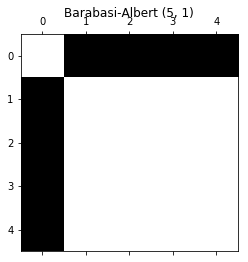

In [9]:
ba = barabasi_albert(5, 1, 2, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5,1.05,'Barabasi-Albert (10, 2)')

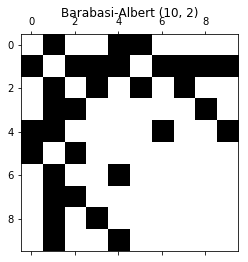

In [10]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

Text(0.5,1.05,'Barabasi-Albert (4589, 23, 25)')

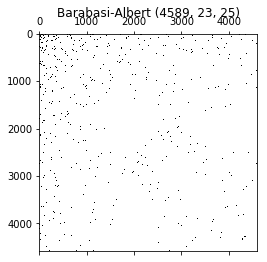

In [11]:
m0 = 25 #corresponds to number of hubs with degree higher than 400
m = int((n_edges - m0 +1) / (n_nodes - m0)) #to have similar number of edges than in our graph
randomBA = barabasi_albert(n_nodes, m, m0, 8708)
plt.spy(randomBA)
plt.title('Barabasi-Albert ({}, {}, {})'.format(n_nodes, m, m0))

We computed the number of edges that should be added for each node (the value m) so that the total number of edges would be similar to the one of our wikipedia graph, depending on the number of initial nodes (m0) in the BA process. To decide on the number of initial nodes, we chose to look at the number of big hubs in our graph, so that we would have something similar in the BA random graph. We decided on a threshold for the number of nodes with more than 400 as degree, there are 25 of them. 

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [12]:
m_ER = int(np.sum(randomER)/2)
m_BA = int(np.sum(randomBA)/2)
m_wiki = n_edges

print('The number of edges in the Erdos-Renyi network is ', m_ER)
print('The number of edges in the Barabási-Albert network is ', m_BA)
print('The number of edges in our wiki network is ', m_wiki)

The number of edges in the Erdos-Renyi network is  106655
The number of edges in the Barabási-Albert network is  104996
The number of edges in our wiki network is  106589


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [13]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    # select the number of degrees that are occuring in the network
    idx_nonzero_p = np.nonzero(p)
    idx_nonzero_q = np.nonzero(q)
    idx_nonzero = np.intersect1d(idx_nonzero_p, idx_nonzero_q)
    
    # now only select those indices
    p = p[idx_nonzero]
    q = q[idx_nonzero]
    
    # now we can make the dot product, taking advantage of numpy fast vector operations
    kl= np.dot(p, np.log(p/q))
    return kl

In [14]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.09151622184943572

In [15]:
# same result as wikipedia examle
p_test = np.array([0.36,0.48,0.16])
q_test = np.array([0.333,0.333,0.333])
kl_divergence( q_test, p_test)

0.09635805194535241

In [16]:
# introduce 0
kl_divergence( np.array([0.3, 0, 0.7]), np.array([0, 0.6, 0.4]))

0.39173105155479576

In [17]:
# same distrib
kl_divergence(np.array([0, 1]), np.array([0,1]))

0.0

### Question 7: 

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence.

**Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

**Hint:** Make sure none of the graphs have disconnected nodes, as KL divergence will not be defined in that case. If that happens with one of the randomly generated networks, you can regenerate it and keep the seed that gives you no disconnected nodes.

In [18]:
# this returns a tuple formed out of two arraysL array1 is the degree distribution, array2 is the degree number
def return_hist(degrees, sequence = None):
    if sequence is None:
        max_degree = max(degrees)
        sequence = np.arange(max_degree+2)
    # # + 2: comes from +1 due to arange and +1 for defining the rightmost edge of the bins
    return np.histogram(degrees, sequence, density=True)

In [19]:
#degree distribution of our network 
degree_wiki=np.sum(adjacency, axis=0)
degree_distribution_wiki= return_hist(degree_wiki)[0]

#compute degree distribution Erdos Renyi Graph
degree_ER=np.sum(randomER, axis =0)
degree_distribution_ER= return_hist(degree_ER)[0]

#degree distribution Barabási-Albert
degree_BA=np.sum(randomBA, axis =0)
degree_distribution_BA= return_hist(degree_BA)[0]


In [20]:
kl_divergence(degree_distribution_wiki, degree_distribution_ER)

0.20751190536564754

In [21]:
kl_divergence(degree_distribution_wiki, degree_distribution_BA)

-0.1985394235993314

### TODO: theoretical degree dist

In [22]:
#theoretical degeree distribution in ER graph
#degree_distribution_ER_theoretical=np.zeros(n_nodes)
#for k in range(n_nodes):
#    degree_distribution_ER_theoretical[k]= scipy.special.binom(n_nodes,k)*np.power(proba,k)*np.power(1-proba,n_nodes-1-k)


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

In [23]:
def plot_distribution(degree, network_type):
    '''
    degree list: the list of node degrees
    network_type: string used for plotting the title
    '''
    fig = plt.figure()
    ax = plt.gca()
    bins = min(int(np.max(degree) - np.min(degree)), 100)
    a = plt.hist(degree, log = True, bins=bins, density=True)
    plt.xlabel('Degree')
    plt.ylabel('Probability of node having degree k')
    plt.title('Degree distribution for '+ network_type)

In [24]:
from scipy import stats

In [25]:
from scipy.stats import powerlaw


In [26]:
!pip install powerlaw 

twisted 18.7.0 requires PyHamcrest>=1.9.0, which is not installed.
You are using pip version 10.0.1, however version 18.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [27]:
import powerlaw

In [28]:
np.seterr(divide='ignore', invalid='ignore')
fit= powerlaw.Fit(degree_wiki)

Calculating best minimal value for power law fit


In [29]:
powerlaw.Fit(degree_wiki)

Calculating best minimal value for power law fit


In [30]:
powerlaw.Distribution(data=degree_wiki, discrete=True)

AttributeError: 'Distribution' object has no attribute '_initial_parameters'

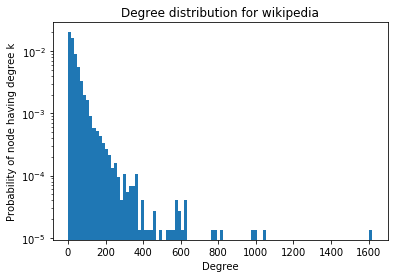

In [31]:
plot_distribution(degree_wiki, 'wikipedia')

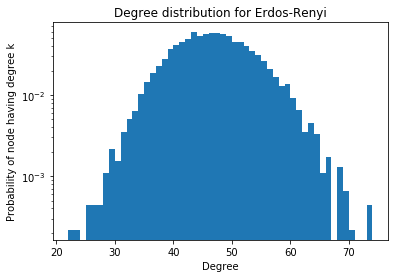

In [32]:
plot_distribution(degree_ER, 'Erdos-Renyi')

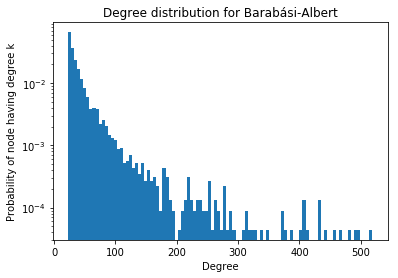

In [33]:
plot_distribution(degree_BA, 'Barabási-Albert')

**Your answer here.**

The plots show that in fact the degree distribution of our network is closer to the degree dist of Barabasi-Albert, contrary to the results indicated by the K-L divergence. 

That is because the KL metric zeros out degrees that have probability 0 in either of the distributions. As we increase the degree, the distribution is more and more sparse, so it is unlikely the similarity of higher degrees is captured.
We can try to apply logarithmic binning to see if the situation changes 

In [34]:
degree_wiki_log = return_hist(degree_wiki, np.geomspace(1, max(degree_wiki)))
degree_BA_log = return_hist(degree_BA, np.geomspace(1, max(degree_BA)))
degree_ER_log = return_hist(degree_ER, np.geomspace(1, max(degree_ER)))

In [35]:
print(kl_divergence(degree_wiki_log[0], degree_ER_log[0] ))
print(kl_divergence(degree_wiki_log[0], degree_BA_log[0] ))

-0.0010748781743342354
-0.06752641875561499


Note: BA is still further away. 

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

Not necessarily, we can prove by a counter-example. The following graphs are not isomorphic, but have the same degree distribution 

Text(0.5,1.05,'G1')

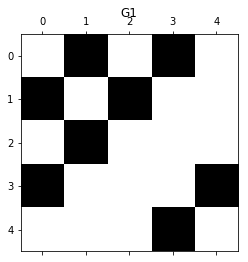

In [36]:
G1 = np.array([
    [0, 1, 0, 1, 0],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 0, 0],
    [1, 0, 0, 0, 1],
    [0, 0, 0, 1, 0]
])
plt.spy(G1)
plt.title('G1')

Text(0.5,1.05,'G2')

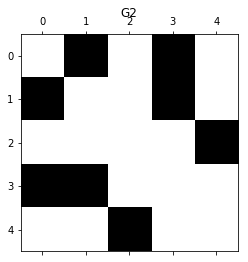

In [37]:
G2 = np.array([
    [0, 1, 0, 1, 0],
    [1, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [1, 1, 0, 0, 0],
    [0, 0, 1, 0, 0]
])
plt.spy(G2)
plt.title('G2')

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

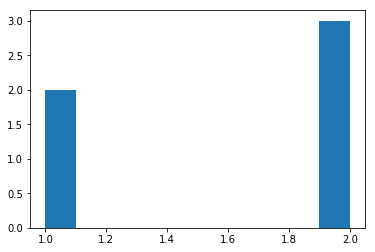

In [38]:
plt.hist(np.sum(G1, axis=0))

(array([2., 0., 0., 0., 0., 0., 0., 0., 0., 3.]),
 array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
 <a list of 10 Patch objects>)

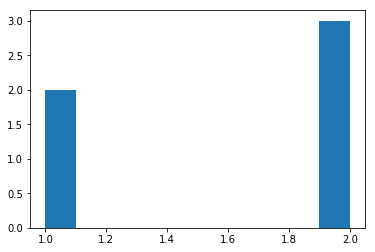

In [39]:
plt.hist(np.sum(G2, axis=0))

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

In [40]:
import networkx as nx
from scipy import sparse

After looking and testing several different models, we think that the BA model is actually a good one for us. Indeed, it is scale free (i.e. the degree distribution follows a power law) as the wikipedia network. Another scale free model is the Watts-Strogatz, but this one returns too homogeneous degrees, not as wikipedia. Hence our choice of BA model, which is used to modelize a lot of internet-like networks. 

BA models have big hubs and then smaller hubs attached to them, exactly like wikipedia. Deleting one big hub should not change the connectivity of the graph (as wikipedia) but deleting the majority of big hubs would disconnect it. 

For those reasons we think the BA model fits our graph well. 

### Question 11

Explain (in short) how the chosen model works.

The variables for the BA model are a number of nodes m0 and a fixed number of edges m that can be attached at each iteration. The initial settings can differ: In our model of question 3, we start with a connected graph of m0 nodes and m0-1 edges and then we do the iteration process of attaching m nodes to the existing nodes, following a distribution that depends on the degree of each node, if the degree is already high then the edge has a larger probability to be attached to it. The BA model in Networkx has the same type of iteration process but start with m0 nodes and NO initial edges. 

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

Text(0.5,1.05,'our Barabasi-Albert model')

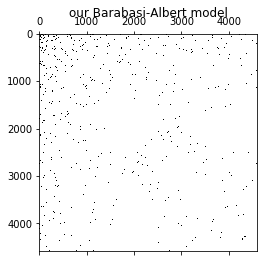

In [41]:
#we created two BA models, one with our previous function and one with the networkx function. 

#previous model
plt.spy(randomBA)
plt.title('our Barabasi-Albert model')

Text(0.5,1.05,'Barabasi-Albert from Networkx')

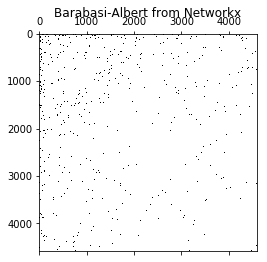

In [42]:
#networkx
G_networkBA= nx.barabasi_albert_graph(n_nodes, m)
networkBA=nx.to_numpy_array(G_networkBA)
plt.spy(networkBA)
plt.title('Barabasi-Albert from Networkx')

#note that our model has the big hubs first, hence the difference in the matrices. 
#This comes from the construction of the algorithm

### Question 13

Check the properties you expected to be similar, and compare to your network.

In [43]:
#number of nodes and edges in the three networks
n_edges_randomBA = int(np.sum(randomBA)/2)
n_edges_networkBA = int(np.sum(networkBA)/2)

print('The number of edges in our original newtork is {}, in the BA model from networkx the number is {} and in our BA model it is {}'.format(n_edges, n_edges_networkBA, n_edges_randomBA)) #check degree distribution follows a power law. similar number of edges, same number of nodes. 

print('The number of nodes are the same, as we and networkx constructed the algorithm for BA based on the number of nodes.')


The number of edges in our original newtork is 106589, in the BA model from networkx the number is 105018 and in our BA model it is 104996
The number of nodes are the same, as we and networkx constructed the algorithm for BA based on the number of nodes.


Below we compute the average clustering coefficients of the three networks 


In [44]:
#Use the sparse matrix power function from milestone 1
def sparse_matrix_pow(A, k):
    As = sparse.csr_matrix(A)
    tmp = As
    for i in range(k-1):
        tmp = tmp*As
    As = tmp
    Ad = np.empty(A.shape, dtype=A.dtype)
    As.todense(out=Ad)
    return Ad

In [45]:
#average clustering coefficient in the three networks: 
#Function to compute the clustering coeff of a node, defined in milestone 1:
def compute_clustering_coefficient(Adjacency, node, power_mat=None, degree=None):
    """Compute the clustering coefficient of a node.
    
    Parameters
    ----------
    adjacency: numpy array
        The (weighted) adjacency matrix of a graph.
    node: int
        The node whose clustering coefficient will be computed. A number between 0 and n_nodes-1.
    
    Returns
    -------
    float
        The clustering coefficient of the node. A number between 0 and 1.
    """

    if power_mat is None:
        power_mat = sparse_matrix_pow(Adjacency, 3)
    L = power_mat[node][node]/2
    #for L we computed the number of triangles based at the node, this number divided by two gives the number of links between the neighbors of the node
    if degree is None:
        degree = np.sum(Adjacency, axis = 0)
    k= degree[node]
    if k in {0, 1}:
        clustering_coefficient= 0
    else:
        clustering_coefficient= L*2/(k*(k-1))
    return clustering_coefficient, power_mat, degree

In [46]:
#Function to compute the average clustering coefficient in a network:

def compute_average_coefficient(Adjacency):

    average_clustering_coefficient=0
    Adjacency_3=sparse_matrix_pow(Adjacency, 3) 
    N=len(Adjacency)
    clustering_coeffs=np.zeros(N)
    for i in range(N):
        clustering_coeffs[i], _, _ = compute_clustering_coefficient(Adjacency, i, Adjacency_3) 
        average_clustering_coefficient+=clustering_coeffs[i]
    
    average_clustering_coefficient=average_clustering_coefficient/N
    
    return average_clustering_coefficient, clustering_coeffs  



In [47]:
#adjacency matrix without self loops 
new_adjacency= adjacency-np.diag(np.diag(adjacency))

In [48]:
average_cluster_coeff_wiki, cluster_coeffs_wiki =compute_average_coefficient(new_adjacency)
average_cluster_coeff_networkBA, cluster_coeffs_networkBA= compute_average_coefficient(networkBA)
average_cluster_coeff_randomBA, cluster_coeffs_randomBA= compute_average_coefficient(randomBA)

KeyboardInterrupt: 

In [ ]:
print('The average clustering coeffcient of our network is {:.5f}, the average clustering coefficient of the networkx BA model is {:.5f} and the average clustering coefficient of our random BA is {:.5f}'.format(average_cluster_coeff_wiki,average_cluster_coeff_networkBA,average_cluster_coeff_randomBA))

In [ ]:
sorted(cluster_coeffs_wiki, reverse=True)

In [ ]:
sorted(cluster_coeffs_randomBA, reverse=True)

In [ ]:
sorted(cluster_coeffs_networkBA, reverse=True)

In [ ]:
degree_wiki_new=np.sum(new_adjacency, axis=0)
degree_randomBA=np.sum(randomBA, axis =0)
degree_networkBA=np.sum(networkBA,axis =0)

In [50]:
print ('The average degree in our wikipedia network is {:.2f}'.format(np.sum(degree_wiki)/n_nodes))
print ('The average degree in the Random BA network is {:.2f}'.format(np.sum(degree_randomBA)/n_nodes))
print ('The average degree in the networkx BA network is {:.2f}'.format(np.sum(degree_networkBA)/n_nodes))

The average degree in the network is 46.45
The average degree in the Random BA network is 45.76
The average degree in the networkx BA network is 45.77


In [51]:
G_wiki=nx.from_numpy_matrix(new_adjacency)
G_randomBA=G=nx.from_numpy_matrix(randomBA)

In [52]:
diam_wiki=nx.diameter(G_wiki)

In [53]:
diam_randomBA=nx.diameter(G_randomBA)

In [55]:
diam_networkBA=nx.diameter(G_networkBA)

In [64]:
print('the diameter of the wikipedia network is {}'.format(diam_wiki))
print('the diameter of the random BA network is {}'.format(diam_randomBA))
print('the diameter of the networkx BA network is {}'.format(diam_networkBA))

the diameter of the wikipedia network is 5
the diameter of the random BA network is 4
the diameter of the networkx BA network is 4


In [ ]:
#check degree distribution follows a power law. similar number of edges, same number of nodes. 

#do it on the 3 graphs and decide whether our model or networkx is better (for now we think ours will fit more)

Are the results what you expected? Explain.

**Your answer here.**